***Analysis of factors affecting loan default probabilities***

**Introduction**
 Loan default risk is a critical concern in the fintech industry, particularly within peer-to-pee 
 (P2P) lending. P2P lending provides direct communication between borrowers and lender 
 while eschewing traditional banking institutions (Kagan, 2024). However, recently, many
 P2P platforms have been unprofitable or even failed due to high loan default rates (Sifrain,
 2023). The reason being asymmetry of information between the borrower and lender an the
 fact that such loans are usually unsecured, thus exposing the lender to significant defaul risk
 (Lyócsa et al., 2022). Likewise, our P2P lending platform is currently exposed to loan efault
 risk, which threatens our company’s operation and profitability. In order to enhance overall
 financial performance and ensure survivability, our analysis aims to reveal essential factors
 affecting default probabilities and suggest strategies to mitigate risk.

**Data Collection**
 The dataset used in this analysis was obtained from Kaggle, titled Bondora Peer-to-Peer
 Lending Loan Data (Kaggle, 2021). This dataset spans the period from February 2009 to July
 2021 and includes probability of default. The broad time horizon is valuable or
 understanding how numerous different factors (more than 100) affect loan default probabilty.
 Additionally, Bondora is one of the leading P2P lending platforms, which means that this
 data, collected from its loan applicants, reflects real-world lending behaviours and treds in
 an important market. Therefore, this dataset provides a comprehensive opportunity to study
 and mitigate default risk in the P2P lending industry.

**Methodology**
Essential variables from the dataset were chosen to evaluate default probabilities, the dependent variable. They include: 
 ● Age: Borrower's age.
 ● Amount: Total loan granted.
 ● Debt-To-Income (DTI): Borrower's debt-to-income ratio.
 ● Education: Borrower's education level.
 ● Employment Status: Current work situation.
 ● Existing Liabilities: Number of existing liabilities.
 ● Income Total: Borrower's total annual income.
 ● Loan Duration: Length of loan repayment period.
 ● Monthly Payment: Monthly loan payment amount.
 ● Probability of Default (POD) : Probability of borrower to fail their rep
 aments.
 Following variable selection, in order to avoid misinterpretation of visualisatons and
 complications in modelling, missing values were removed (Acock, 2005). 3 categorical variables 
 such as employment status and education had certain irrelevant levels’
 removed to gain consequential insights from visualisations. Additionally, to includethem in
 regression analysis, these categorical variables were turned into dummy variabls and a
 ‘level’ was dropped to avoid multicollinearity (Morrow-Howell, 1994). Data statisics are
 also viewed to gain deeper insights of data distrbution.
 Data exploration tools like visualisations (histograms, box plots and bar charts) areused to
 gain insights and identify patterns of the relationship between selected variables. Only the
 most informative visualisations were presented in this report. After careful obsevation,
 scatter plots were not used due to lack of crucial information that might help us mitigate
 default probabilities. Apart from visualisations, a multiple linear
 regression model is constructed using the ordinary least squares method for further aalysis.
 Model coefficient results are evaluated and statistical significance is tested using p-values.

In [1]:
#import packages
import os
os.getcwd()
import math
import statistics
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [ ]:
#importing dataset
file_path = "C:\\Users\\Arman Sahil\\Desktop\\Project for Python\\P2P\\Loan_Data.csv"

#Creating dataframe
loan_data = pd.read_csv(file_path, low_memory=False)

In [ ]:
#selecting columns
loan_data.columns
loan_data_col = loan_data[["Age", "Amount", "DebtToIncome", "Education", 
                           "EmploymentStatus", "ExistingLiabilities", 
                           "IncomeTotal", "LoanDuration", "MonthlyPayment", "ProbabilityOfDefault"]]

#Looking at the dataset
print(loan_data_col.head())
print(loan_data_col.columns)

In [ ]:
#Checking data types
loan_data_col.dtypes

In [ ]:
#Checking for missing values
missing_value = loan_data_col.isna().sum()
print(missing_value)

#Removing missing values
loan_data_clean = loan_data_col.dropna(axis=0)

#Checking whether missing values were removed
clean = loan_data_clean.isna().sum()
print(clean) #missing values are successfully removed

In [ ]:
#Checking the number of rows and columns
rows = loan_data_clean.shape[0]
print(rows) #Number of rows are 172540
columns = loan_data_clean.shape[1]
print(columns) #Number of columns are 10

In [ ]:
###changing the categorical variables to select certain categories
##Education
#Selecting certain categories and removing undefined ones
print(loan_data_clean["Education"].unique()) #education has '0' and '-1' which needs to be removed, along with certain unnecessary levels

loan_data_edu_filtered = loan_data_clean[~loan_data_clean['Education'].isin([0, 2, 3, -1])]
print(loan_data_edu_filtered.head())
print(loan_data_edu_filtered["Education"].unique()) #Remaining are 1:Primary Education, 4:Secondary Education, 5:Higher Education

In [ ]:
##Employment Status
#Selecting certain categories and removing undefined ones
print(loan_data_clean["EmploymentStatus"].unique()) #employment status has has '0' and '-1' which needs to be removed, along with certain unnecessary levels

loan_data_filtered = loan_data_edu_filtered[~loan_data_edu_filtered['EmploymentStatus'].isin([0, 2, 5, 6, -1])]
print(loan_data_filtered.head())
print(loan_data_filtered["EmploymentStatus"].unique()) #Remaining are 3:Fully Employed, 4:Self-Employed

In [ ]:
#Statistics
loan_data_filtered.select_dtypes(include=['number']).describe()

In [ ]:
#Visualization - 1
# Columns to compare
x_variables = ['Age', 'DebtToIncome', 'Education', 'EmploymentStatus', 'IncomeTotal', 'LoanDuration', 'MonthlyPayment']
y_variable = 'ProbabilityOfDefault' 

# Loop to create individual scatter plots for each x-variable against Y
plt.figure(figsize=(15, 8))
for i, x_var in enumerate(x_variables, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data=loan_data_filtered, x=x_var, y=y_variable) #loan_data_filtered refers to the final clean dataset
    plt.title(f'{y_variable} vs {x_var}')
    plt.tight_layout()

# Display the combined plot
plt.show()

No significant information can bederived from these graphs.

C:\Users\Arman Sahil\AppData\Local\Temp\ipykernel_129988\1177718371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data_filtered, x='EmploymentStatus', y='ProbabilityOfDefault', palette="Blues")
C:\Users\Arman Sahil\AppData\Local\Temp\ipykernel_129988\1177718371.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Fully employed', 'Self-employed'])


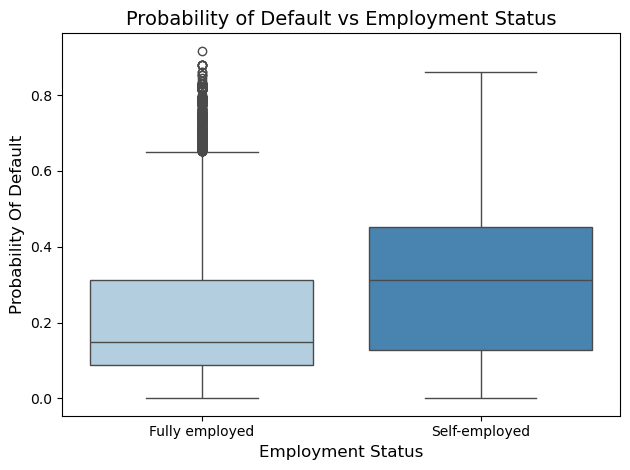

In [25]:
#Visualization - 2
# Plot Probability of Default vs Employment Status
sns.boxplot(data=loan_data_filtered, x='EmploymentStatus', y='ProbabilityOfDefault', palette="Blues")
plt.title('Probability of Default vs Employment Status', fontsize=14)
plt.ylabel('Probability Of Default', fontsize=12 )
plt.xlabel('Employment Status', fontsize=12)
# Label the x-axis with clearer categories
plt.gca().set_xticklabels(['Fully employed', 'Self-employed'])

# Display the plot
plt.tight_layout()
plt.show()

Visualization - 2 shows that the median POD of borrowers who are fully employed are lower than
 borrowers who are self-employed; demonstrating, on average, self-employed borrowers hav
 a higher default risk. Moreover, the interquartile range shows POD for self-employd
 borrowers have higher variability than fully employed borrowers, suggesting pooer
 predictability of default probabilities. This dispersion arises due to fluctuating income le 
 4
(Meager & Bates, 2001). Hence, overall, self-employed individuals have a higher credi risk
 and loan approvals should depend on case-by-case basis (Gaudêncio et al., 2019).

In [27]:
#Visualization - 3 part 1
#Filtering Fully employed
fully_employed_df = loan_data_filtered[loan_data_filtered['EmploymentStatus'] == 3] #'3' represents 'Fully Employed'

In [29]:
#Visualization - 3 part 2
unique_employment_status = fully_employed_df['EmploymentStatus'].unique()

# Printing unique values to confirm if only fully employed is in the dataset
print(unique_employment_status) #fully employed was correctly filtered out - '3' represents 'Fully Employed'

[3.]


In [31]:
#Visualization - 3 part 3
#Figuring out the upper bound of fully employed boxplot from visualization 2
stats = loan_data_filtered.groupby(['EmploymentStatus'])['ProbabilityOfDefault'].describe()

In [ ]:
#Visualization - 3 part 4
# Calculate the Upper Bound for outliers
stats['IQR'] = stats['75%'] - stats['25%']  # Interquartile Range
stats['Upper Bound'] = stats['75%'] + 1.5 * stats['IQR']  # Upper Bound for outliers

# Display statistics including Upper Bound
print(stats)

In [ ]:
#Visualization - 3 part 5
#Filtering with the upper bound for fully employed to get the outliers for fully employed from visualization 2
filtered_df_upper = fully_employed_df[fully_employed_df['ProbabilityOfDefault'] > 0.649805] #value of 0.649805 taken from upper bound
print(filtered_df_upper.shape[0]) #to see the number of rows
print(filtered_df_upper.describe())

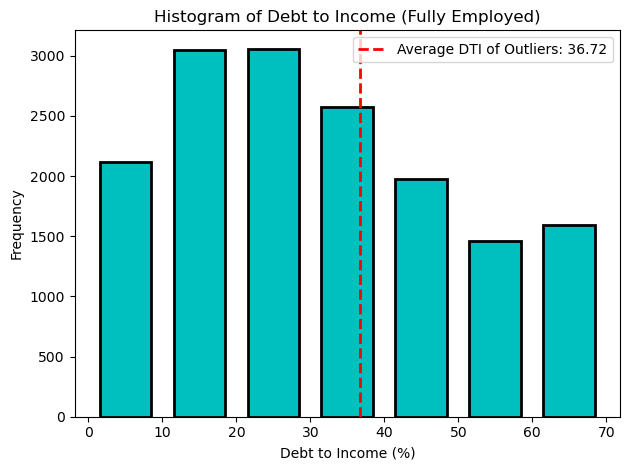

In [37]:
#Visualization - 3 part 6
#Get mean debt to income for the outliers in visualization 2 
mean_value = filtered_df_upper['DebtToIncome'].mean() 

plt.hist(fully_employed_df['DebtToIncome'], rwidth=0.7, bins=[0,10,20,30,40,50,60,70], color='c', edgecolor='black', linewidth=2)
#Display a dotted line
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Average DTI of Outliers: {mean_value:.2f}') #DTI refers to debt to income
plt.title('Histogram of Debt to Income (Fully Employed)')
plt.xlabel('Debt to Income (%)')
plt.ylabel('Frequency')

#Display legend for dotted line
plt.tight_layout()
plt.legend()
plt.show()

The following analysis will investigate the characteristics of fully employed borrowers, exhibiting extreme default probabilities; primarily their outliers as presented in Visualization 2. The frequency distribution of debt-to-income ratio for fully employed individuals is shown in Visualization 3. The distribution is positively skewed with maximum frequency occurring between debt-to-income ratio of 10%-30%. Additionally, the average debt-to-income ratio for the outliers of 36.72%, calculated using high default probabilities of fully employed individuals, represents a risk threshold. A higher debt-to-income ratio indicates a higher proportion of income goes towards debt serviceability, reducing funds for everyday expenses and future debt payments (Frame et al., 2020). Therefore, a cautious approach should be undertaken for fully employed loan applicants with a ratio greater than 36.72%. For comparison, a debt-to-income ceiling of 36% is prevalent in the lending market, validating our threshold aligns with industry standards (Fannie Mae, 2024; Wells, 2024). Additional information should be gathered concerning these high-risk applicants for loan approval, like, number of dependents and third party credit scores.

C:\Users\Arman Sahil\AppData\Local\Temp\ipykernel_129988\81402776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data_filtered, x='Education', y='ProbabilityOfDefault', palette="Reds")
C:\Users\Arman Sahil\AppData\Local\Temp\ipykernel_129988\81402776.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Primary education', 'Secondary education', 'Higher education'])


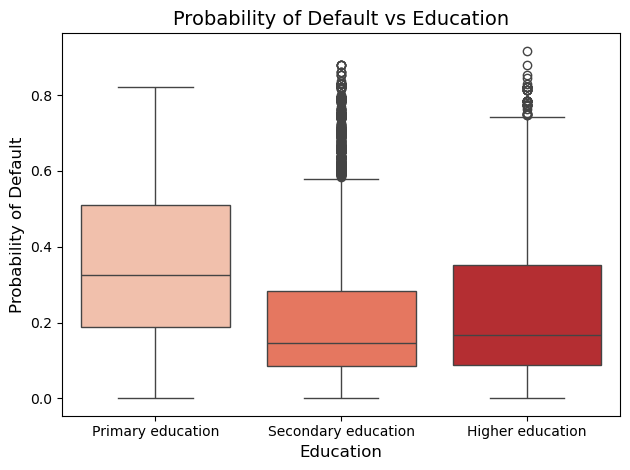

In [39]:
#Visualization - 4 
sns.boxplot(data=loan_data_filtered, x='Education', y='ProbabilityOfDefault', palette="Reds")
plt.title('Probability of Default vs Education', fontsize=14)
plt.ylabel('Probability of Default', fontsize=12 )
plt.xlabel('Education', fontsize=12)
# Label the x-axis with clearer categories
plt.gca().set_xticklabels(['Primary education', 'Secondary education', 'Higher education'])

# Display the plot
plt.tight_layout()
plt.show()

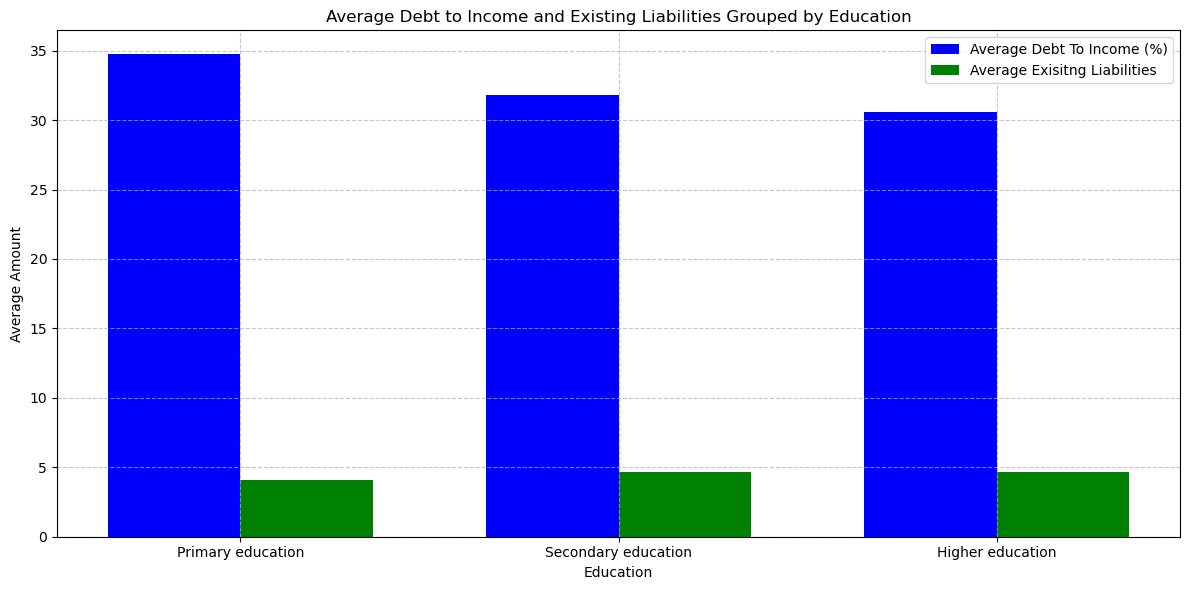

In [41]:
#Visualization - 5 [Figure 4 in the report]
# Group the data by Education and calculate the mean Debt to income and Existing Liabilities 
education_groups = loan_data_filtered.groupby('Education').agg({
    'DebtToIncome': 'mean',
    'ExistingLiabilities': 'mean'
}).reset_index()

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(education_groups))

# Plotting Loan Amount and Income side by side
plt.bar(index, education_groups['DebtToIncome'], bar_width, label='Average Debt To Income (%)', color='b')
plt.bar([i + bar_width for i in index], education_groups['ExistingLiabilities'], bar_width, label='Average Exisitng Liabilities', color='g')

# Add labels and title
plt.xlabel('Education')
plt.ylabel('Average Amount')
plt.title('Average Debt to Income and Existing Liabilities Grouped by Education')

# Add x-ticks and rotate them for readability
plt.xticks([i + bar_width / 2 for i in index], education_groups['Education'])

plt.gca().set_xticklabels(['Primary education', 'Secondary education', 'Higher education'])

# Add legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7) # Add gridlines for better readability

# Display the plot
plt.tight_layout()
plt.show()

Visualization 4 shows those with secondary and higher education have lower POD than those with only primary education, who have the highest default probability. High default probabilities may be related to higher debt-to-income ratios. Visualization 5 shows the debt-to-income ratio is higher for those with primary education than for those with any other education. This may mean that people with primary education have lower income levels, making it difficult to repay the loan (Faster Capital, 2024). So, loan applications from primary education borrowers should be rejected, unless other factors suggest the borrower might have low risk, for example, credit history showing timely payments of loan obligations. Furthermore, Visualization 5 shows that higher debt-to-income ratio for primary education borrowers is not due to higher existing liabilities. This indicates that there are other essential factors affecting default probabilities, like, credit score. This serves as a limitation in our analysis. However, due to resource constraints, our firm has decided to focus on these specific factors.

In [43]:
#Visualization - 6 part 1
#Filtering secondary education
secondary_edu = loan_data_filtered[loan_data_filtered['EmploymentStatus'] == 4] #4 refers to secondary education

In [ ]:
#Visualization - 6 part 2
#Checking if secondary education was filtered out
unique_education_status = secondary_edu['EmploymentStatus'].unique()

# Print unique values to confirm
print(unique_education_status)

In [ ]:
#Visualization - 6 part 3
#Grouping by education to find the upper bound in visualization 4
stats_edu = loan_data_filtered.groupby(['Education'])['ProbabilityOfDefault'].describe() # 4 refers to secondary education

# Calculate the Upper Bound for outliers
stats_edu['IQR'] = stats_edu['75%'] - stats_edu['25%']  # Interquartile Range
stats_edu['Upper Bound'] = stats_edu['75%'] + 1.5 * stats_edu['IQR']  # Upper Bound for outliers

# Display the relevant statistics including Upper Bound
print(stats_edu)

In [ ]:
#Visualization - 6 part 4
#Filtering the outliers as per visualization 4
filtered_df_upper_edu = secondary_edu[secondary_edu['ProbabilityOfDefault'] > 0.580304] #0.580304 is the value of the upper bound
print(filtered_df_upper_edu.shape[0])
print(filtered_df_upper_edu.describe())

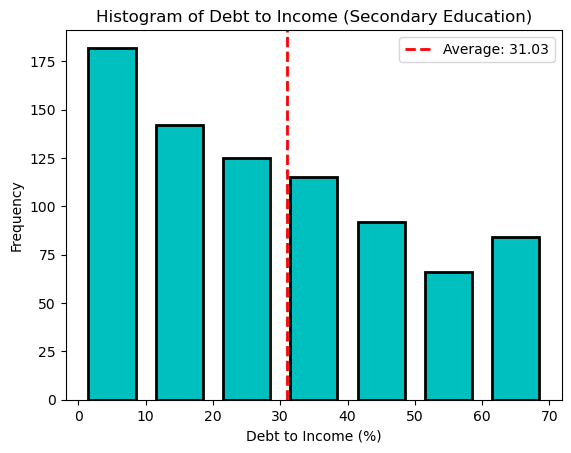

In [51]:
#Visualization - 6 part 5
#Taking average debt to income of the outliers
mean_value_edu = filtered_df_upper_edu['DebtToIncome'].mean() 

plt.hist(secondary_edu['DebtToIncome'], rwidth=0.7, bins=[0,10,20,30,40,50,60,70], color='c', edgecolor='black', linewidth=2)
plt.axvline(mean_value_edu, color='red', linestyle='dashed', linewidth=2, label=f'Average: {mean_value_edu:.2f}')
plt.title('Histogram of Debt to Income (Secondary Education)')
plt.xlabel('Debt to Income (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The above graph examines the outliers presented in secondary education, Visualization 4. The frequency distribution in Visualization 6 shows the distribution of debt-to-income for those with secondary education. The majority frequency range for debt-to-income appears to be within 0-10%. The outliers portray an average debt-to-income ratio of 31%. As the outliers appear to be secondary education individuals having attributes contributing to a higher POD, a cutoff at 31% should be used to identify high-risk borrowers. This cautious and conservative threshold, which is within industry norms of 28%-36% helps to minimise defaults (Wells, 2024).

In [ ]:
#Regression analysis
#Adding Dummy variables 
categorical = ["Education", "EmploymentStatus"]
loan_data_dummy = pd.get_dummies(loan_data_filtered, columns = categorical, drop_first = True)

#checking data types
print(loan_data_dummy.dtypes)

In [ ]:
#changing dummy boolean data type to int
dummy_columns = loan_data_dummy.select_dtypes(include = "bool").columns
loan_data_dummy[dummy_columns] = loan_data_dummy[dummy_columns].astype(int)

#Checking new data types
loan_data_dummy.dtypes

In [ ]:
#checking  columns
print(loan_data_dummy.columns)
print(loan_data_dummy.head())

In [59]:
#Selecting dependant and independant variables
X = loan_data_dummy[['Age', 'Amount', 'DebtToIncome', 'ExistingLiabilities', 'IncomeTotal',
       'LoanDuration', 'MonthlyPayment', 'Education_4.0', 'Education_5.0', 'EmploymentStatus_4.0']]
Y = loan_data_dummy["ProbabilityOfDefault"]

In [61]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [63]:
#Finding r squared
y_pred = model.predict(X)
r2=r2_score(Y,y_pred)
print("r2", r2)

r2 0.19385280558515006


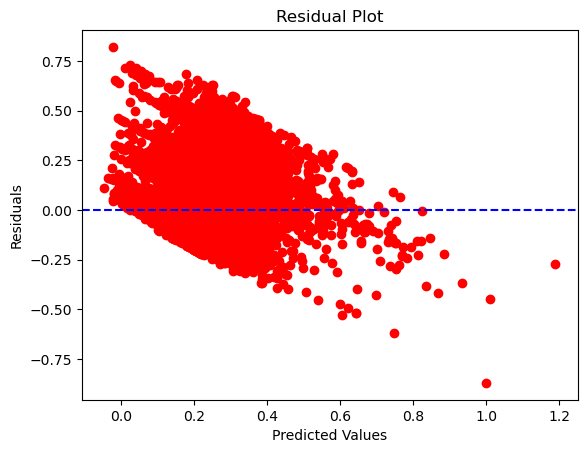

In [65]:
# Residual plot
y_pred = model.predict(X)
residuals = Y - y_pred

#adding constant
x = sm.add_constant(X)

plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='blue', linestyle='--')  # Horizontal line at 0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [67]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 0.4358908685100239
Coefficients: [-2.73689847e-03 -1.91268923e-05 -8.79241865e-05  1.45184411e-03
 -2.44696350e-06 -1.63195089e-04  4.35853336e-04 -1.21048511e-01
 -1.00753045e-01  7.23130721e-02]


In [69]:
#For model summary
#adding constant
x = sm.add_constant(X)

model_ols = sm.OLS(Y, x).fit()

#Print summary which includes p-values
print(model_ols.summary())

                             OLS Regression Results                             
Dep. Variable:     ProbabilityOfDefault   R-squared:                       0.194
Model:                              OLS   Adj. R-squared:                  0.193
Method:                   Least Squares   F-statistic:                     399.9
Date:                  Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                          19:48:19   Log-Likelihood:                 6842.8
No. Observations:                 16642   AIC:                        -1.366e+04
Df Residuals:                     16631   BIC:                        -1.358e+04
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

In [71]:
#Printing just the coefficients
summary_data = {'Variable': ['Intercept'] + X.columns.tolist(),
                'Coefficient': [model.intercept_] + model.coef_.tolist()}
summary_df = pd.DataFrame(summary_data)
print(summary_df)

                Variable  Coefficient
0              Intercept     0.435891
1                    Age    -0.002737
2                 Amount    -0.000019
3           DebtToIncome    -0.000088
4    ExistingLiabilities     0.001452
5            IncomeTotal    -0.000002
6           LoanDuration    -0.000163
7         MonthlyPayment     0.000436
8          Education_4.0    -0.121049
9          Education_5.0    -0.100753
10  EmploymentStatus_4.0     0.072313


**Regression Model Analysis**
A multiple linear regression model is built to gain more insights into the relationship between the POD and the borrower specific factors. The model has an R-squared value of 0.194. The model was able to account for only 19% of the variance observed in the target variable (Boateng & Oduro, 2018). This shows that although the model accounts for certain characteristics that lead to loan defaults, other exogenous factors have a substantial impact and were left out of the model. This serves as a limitation of the following regression analysis. Debt-to-income ratio is statistically insignificant as the p-value is more than 0.1, suggesting a weak relationship with the target variable. All other variables appear to be statistically significant, having a p-value of less than 0.1. The model shows the minimum POD would be 0.436 if all independent variables are equal to zero. This high value might be an indication of omission of imperative variables. For the dummy variables, borrowers with secondary and higher education have 0.1210 and 0.1008 lower POD respectively than those with primary education. Moreover, self-employed individuals have a 0.0723 higher POD than fully employed individuals. These results complement the deduction from our visualisations. Furthermore, the regression model shows for every $1 increase in loan amount, POD decreases by 0.000019 on average and for every 1 unit increase in existing liabilities, POD increases by 0.001452 on average whilst holding all other independent variables constant. Hence, loan applications with low loan amounts and significant prior debt should undergo further risk evaluation, for example, analysis of the purpose of the loan by the borrower (Croux et al., 2020; Harrison et al., 2004).

**Conclusion**
The goal of this report was to uncover the underlying factors that contribute to credit default risk in the P2P lending industry, using the Bondora dataset. Using visualisations and a linear regression model, POD was accessed based on borrower characteristics. The results of our analysis found individuals who are self-employed and have until secondary education are high-risk borrowers and their loan application should be approached with caution. Furthermore, a debt-to-income ratio of over 31% on average is considered to be a characteristic of high-risk borrowers. These findings have direct implications for our in-house credit evaluation process and loan approval, enabling us to refine our assessment of creditworthiness. By focusing on key variables like employment status and education, we can enhance the accuracy of risk assessments and optimise our lending strategies.
Future studies to further develop our current analysis can include a wider range of variables, like, macroeconomic factors, to gain a deeper understanding of factors influencing default probability. Different variable selection methods like the lasso selection (chooses variables significantly affecting default probabilities) can be utilised, and other models like decision trees can be used to improve model accuracy (Croux et al., 2020).

**References**
Acock, A. C. (2005). Working with missing values. Journal of Marriage and Family, 67(4), 1012–1028. https://doi.org/10.1111/j.1741-3737.2005.00191.x 

Boateng, E. Y., & Oduro, F. T. (2018). Predicting Microfinance Credit Default: A Study of Nsoatreman Rural Bank, Ghana. Journal of Advances in Mathematics and Computer Science, 26(1), 1–9. https://doi.org/10.9734/jamcs/2018/33569

Croux, C., Jagtiani, J., Korivi, T., & Vulanovic, M. (2020). Important factors determining Fintech loan default: Evidence from a lendingclub consumer platform. Journal of Economic Behavior & https://doi.org/10.1016/j.jebo.2020.03.016

Fannie Mae. (2024). Organization, 173, Debt-to-Income 270–296. Ratios. https://selling-guide.fanniemae.com/sel/b3-6-02/debt-income-ratios#:~:text=%2C%20Income%20Assessment).-,Maximum%20DTI%20Ratios,reflected%20in%20the%20Eligibility%20Matrix.
 
Frame, S., Gerardi, K., Sexton, D., & Tracy, J. (2020, March). Ability to repay a mortgage: Assessing the relationship between default, debt-to-income. Federal Reserve Bank of Dallas. https://www.dallasfed.org/research/economics/2020/0324
 
Faster Capital. (2024). Debt to income ratio: The Role it Plays in Default Rates. https://fastercapital.com/content/Debt-to-income-ratio--The-Role-it-Plays-in-DefaultRates.html

Gaudêncio, J., Mazany, A., & Schwarz, C. (2019, March). The impact of lending standards on default rates of residential real estate loans. European Central Bank. https://www.ecb.europa.eu/pub/pdf/scpops/ecb.op220~47edfcc84d.en.pdf
 
Harrison, D. M., Noordewier, T. G., & Yavas, A. (2004). Do riskier borrowers borrow more? Real Estate Economics, 32(3), 385–411. https://doi.org/10.1111/j.1080-8620.2004.00096.x

Kagan, J. (2024). What Is Peer-to-Peer (P2P) Lending? Definition and How It Works. Investopedia. https://www.investopedia.com/terms/p/peer-to-peer-lending.asp

Kaggle. (2021). Bondora Peer to Peer Lending Loan Data. Kaggle. https://www.kaggle.com/datasets/sid321axn/bondora-peer-to-peer-lending-loan-data

Lyócsa, Š., Vašaničová, P., Hadji Misheva, B., & Vateha, M. D. (2022). Default or profit scoring credit systems? Evidence from European and US peer-to-peer lending markets. Financial Innovation, 8(1), 1–21. https://doi.org/10.1186/s40854-022-00338-5

Morrow-Howell, N. (1994). The M word: Multicollinearity in multiple regression. Social Work Research, 18(4), 247–251. https://doi.org/10.1093/swr/18.4.247

Meager, N., & Bates, P. (2001). The Self-Employed and Lifetime Incomes: Some UK evidence. International Journal of Sociology, 31(1), 27–58. https://doi.org/10.1080/15579336.2001.11770225
 
Sifrain, R. (2023). Predictive Analysis of Default Risk in Peer-to-Peer Lending Platforms: Empirical Evidence from LendingClub. Journal of Financial Risk Management, 12, 28-49. https://doi.org/10.4236/jfrm.2023.121003

Wells, L. (2024, June 7). What is a debt-to-income ratio for a mortgage? Bankrate. https://www.bankrate.com/mortgages/why-debt-to-income-matters-in-mortgages/?tpt=b